# import modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Loading dataset

In [4]:
data=pd.read_csv('C:\\Users\\USER\\Desktop\\marh\\WA_Marketing-Campaign.csv')
data.head(5)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MarketID,548.0,5.715328,2.877001,1.00,3.000,6.0,8.0000,10.00
LocationID,548.0,479.656934,287.973679,1.00,216.000,504.0,708.0000,920.00
AgeOfStore,548.0,8.503650,6.638345,1.00,4.000,7.0,12.0000,28.00
Promotion,548.0,2.029197,0.810729,1.00,1.000,2.0,3.0000,3.00
week,548.0,2.500000,1.119055,1.00,1.750,2.5,3.2500,4.00
SalesInThousands,548.0,53.466204,16.755216,17.34,42.545,50.2,60.4775,99.65


In [6]:
data.shape

(548, 7)

In [7]:
#checking for null value
data.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [8]:
#Getting info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [11]:
data.drop_duplicates()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


# Correlation matrix

<AxesSubplot:>

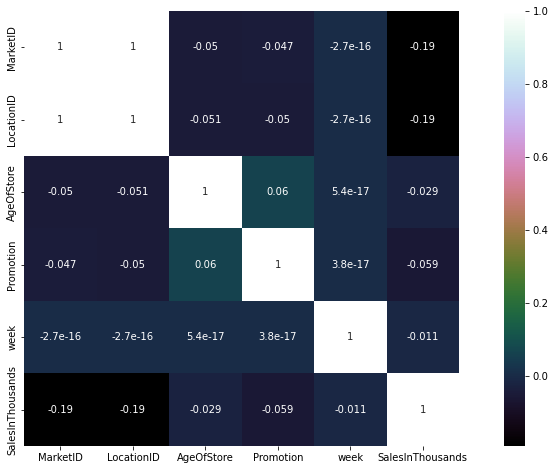

In [13]:
data_corr=data.corr(method='pearson')
plt.figure(figsize=(16,8))
sns.heatmap(data_corr,annot=True,vmax=1,square=True,cmap='cubehelix')

# Data exploratory

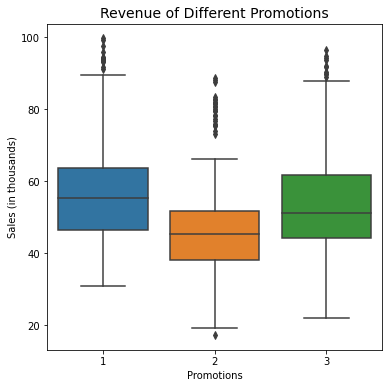

In [15]:
fig= plt.figure(figsize=(6,6))
              
ax = sns.boxplot(y="SalesInThousands", data=data, x='Promotion', 
                 order =[1,2,3])
ax.set_ylabel('Sales (in thousands)')
ax.set_xlabel('Promotions')
ax.set_title('Revenue of Different Promotions', fontsize=14)
plt.show()

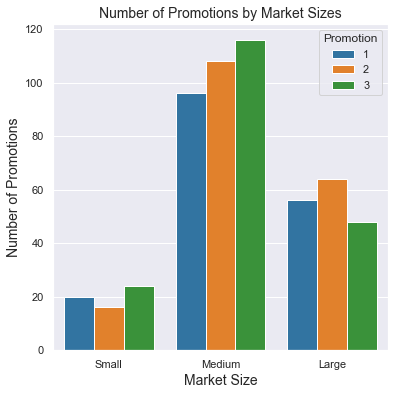

In [19]:
data_bar = data.groupby(['Promotion','MarketSize']).size().to_frame().reset_index()
data_bar.rename({0:'NumOfStore'}, axis=1, inplace=True)

sns.set_theme()
plt.figure(figsize=(6,6))
ax = sns.barplot(x='MarketSize', y='NumOfStore',hue='Promotion', 
                 data=data_bar, hue_order=[1,2,3], palette='tab10', order=['Small', 'Medium','Large'])
# ax.set(xlabel='Promotion Type', ylabel='Number of Stores', fontsize=18)
plt.xlabel('Market Size', fontsize=14)
plt.ylabel('Number of Promotions', fontsize=14)
plt.legend(title='Promotion')
plt.title('Number of Promotions by Market Sizes', fontsize=14)
plt.show()

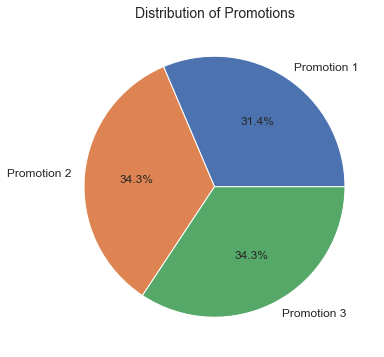

In [20]:
sns.set_theme()
plt.figure(figsize=(6,6))
pie_labels = ['Promotion 1', 'Promotion 2', 'Promotion 3']
plt.pie(data.groupby(['Promotion']).size().to_list(), 
        labels=pie_labels, autopct='%1.1f%%',textprops={'fontsize': 12})
plt.title('Distribution of Promotions', fontsize=14)
plt.show()

In [21]:
data.groupby('Promotion')['SalesInThousands'].mean()

Promotion
1    58.099012
2    47.329415
3    55.364468
Name: SalesInThousands, dtype: float64

In [24]:
df1_sale = data[data['Promotion'] == 1]['SalesInThousands']
df2_sale = data[data['Promotion'] == 2]['SalesInThousands']
df3_sale = data[data['Promotion'] == 3]['SalesInThousands']

In [25]:
stats.f_oneway(df1_sale, df2_sale, df3_sale)

F_onewayResult(statistic=21.953485793080677, pvalue=6.765849261408714e-10)

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-10.7696,0.0,-14.7738,-6.7654,True
1,3,-2.7345,0.2444,-6.7388,1.2697,False
2,3,8.0351,0.0,4.1208,11.9493,True


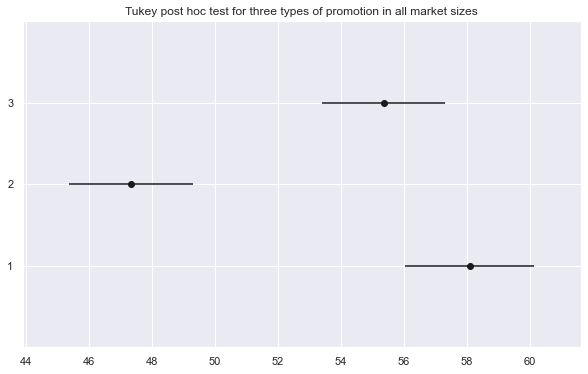

In [31]:
df = pairwise_tukeyhsd(endog=data['SalesInThousands'],     
                          groups=data['Promotion'],   
                          alpha=0.05)          

df.plot_simultaneous()  
plt.title("Tukey post hoc test for three types of promotion in all market sizes")
df.summary()

In [32]:
# Data preparation
data['market-promotion'] = data['MarketSize'].astype(str) + '-' + data['Promotion'].astype(str)
data.head(3)

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands,market-promotion
0,1,Medium,1,4,3,1,33.73,Medium-3
1,1,Medium,1,4,3,2,35.67,Medium-3
2,1,Medium,1,4,3,3,29.03,Medium-3


In [33]:
small1 = data.loc[(data['market-promotion']=='Small-1'), 'SalesInThousands']
small2 = data.loc[(data['market-promotion']=='Small-2'), 'SalesInThousands']
small3 = data.loc[(data['market-promotion']=='Small-3'), 'SalesInThousands']

In [34]:
stats.f_oneway(small1, small2, small3) 

F_onewayResult(statistic=16.57648112557373, pvalue=2.115939995841426e-06)

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-9.3519,0.0,-13.683,-5.0208,True
1,3,-0.6483,0.9161,-4.5579,3.2612,False
2,3,8.7035,0.0,4.5359,12.8712,True


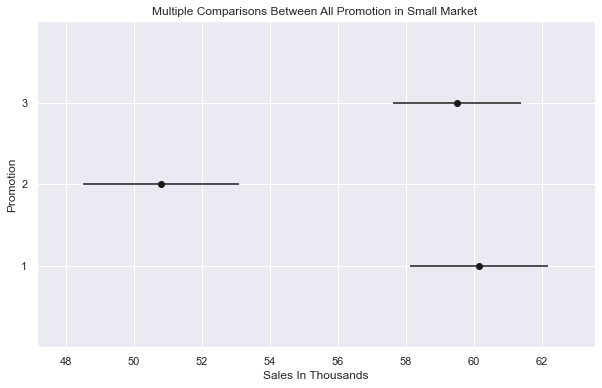

In [35]:
small = data.loc[data['MarketSize'] == 'Small', :]

df_small = pairwise_tukeyhsd(endog=small['SalesInThousands'],  
                          groups=small['Promotion'],   
                          alpha=0.05)  

df_small.plot_simultaneous()    
plt.title("Multiple Comparisons Between All Promotion in Small Market ")
plt.xlabel("Sales In Thousands")
plt.ylabel("Promotion")


df_small.summary()

In [36]:
large1 = data.loc[(data['market-promotion']=='Large-1'), 'SalesInThousands']
large2 = data.loc[(data['market-promotion']=='Large-2'), 'SalesInThousands']
large3 = data.loc[(data['market-promotion']=='Large-3'), 'SalesInThousands']


In [37]:
stats.f_oneway(large1, large2, large3) 

F_onewayResult(statistic=21.44511115677835, pvalue=5.261567483455427e-09)

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-14.9139,0.0,-21.5279,-8.2998,True
1,3,1.9681,0.79,-5.1418,9.078,False
2,3,16.8819,0.0,9.9802,23.7837,True


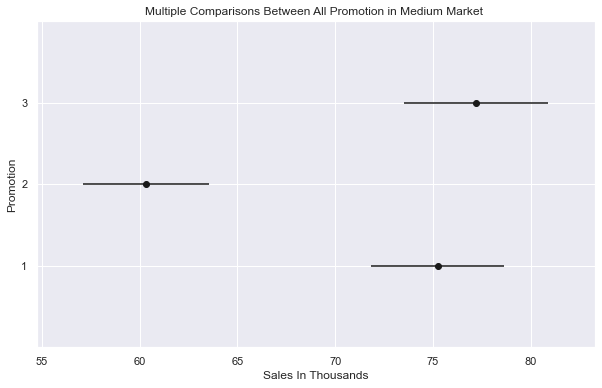

In [38]:
large = data.loc[data['MarketSize'] == 'Large', :]

df_large = pairwise_tukeyhsd(endog=large['SalesInThousands'],  
                          groups=large['Promotion'],   
                          alpha=0.05)  

df_large.plot_simultaneous()    
plt.title("Multiple Comparisons Between All Promotion in Medium Market ")
plt.xlabel("Sales In Thousands")
plt.ylabel("Promotion")

df_large.summary() 

In [39]:
medium1 = data.loc[(data['market-promotion']=='Medium-1'), 'SalesInThousands']
medium2 = data.loc[(data['market-promotion']=='Medium-2'), 'SalesInThousands']
medium3 = data.loc[(data['market-promotion']=='Medium-3'), 'SalesInThousands']


In [40]:
stats.f_oneway(medium1, medium2, medium3)  

F_onewayResult(statistic=29.68813375084531, pvalue=1.5197404971604578e-12)

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-8.5583,0.0,-11.3107,-5.8058,True
1,3,-2.2037,0.1356,-4.9111,0.5037,False
2,3,6.3545,0.0,3.7307,8.9783,True


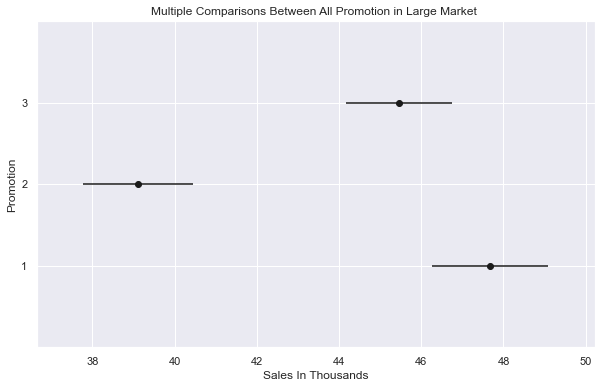

In [55]:
medium = data.loc[data['MarketSize'] == 'Medium', :]
df_medium = pairwise_tukeyhsd(endog=medium['SalesInThousands'],  
                          groups=medium['Promotion'],   
                          alpha=0.05)  

df_medium.plot_simultaneous()    
plt.title("Multiple Comparisons Between All Promotion in Large Market ")
plt.xlabel("Sales In Thousands")
plt.ylabel("Promotion")
# plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

df_medium.summary()